# pandas
Here we will have a quick play with a pandas DataFrame and use what we've learned about accessing them to answer some questions.

We stopped ten people in the street and asked them what pets they have. We also recorded the person's sex and age.

In [1]:
import numpy as np
import pandas as pd

In [2]:
pets = pd.DataFrame({'sex': np.array(['M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'F', 'M']),
                   'age': np.array([21, 45, 23, 56, 47, 70, 34, 30, 19, 62]),
                   'pets': np.array([['cat', 'dog'],
                                    ['hamster'],
                                    ['cat', 'gerbil'],
                                    ['fish', 'hamster', 'gerbil'],
                                    ['cat'],
                                    ['dog'],
                                    ['dog'],
                                    ['cat'],
                                    ['rabbit', 'cat'],
                                    ['dog']])})

/var/folders/pc/jk8331m954j2gtdqg6rgc1qh0000gn/T/ipykernel_48548/627336042.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  'pets': np.array([['cat', 'dog'],


We have been asked to analyse the survey responses. In particular, we have been given the questions

* What sex was the youngest respondent?
* What age was the person with the most pets?
* What was the most popular pet?
* What was the average age of dog owners?


Firstly, let's just look at the data. It's not very big so we don't actually even need to use head().

In [3]:
pets

,sex,age,pets
0,M,21,"[cat, dog]"
1,M,45,[hamster]
2,F,23,"[cat, gerbil]"
3,M,56,"[fish, hamster, gerbil]"
4,F,47,[cat]
5,F,70,[dog]
6,F,34,[dog]
7,M,30,[cat]
8,F,19,"[rabbit, cat]"
9,M,62,[dog]


Notice here, as well, how the notebook has a nice default presentation for DataFrames. And, yes, you can customize this! We won't be going into that here.

## What sex was the youngest respondent?
Hint, you might find the .loc accessor useful here. Think about breaking this task down into creating a boolean index that is True where the value in the age column is equal to the minimum of the age column. Then select the sex column.

In [5]:
# one line of code
pets.loc[pets["age"] == min(pets["age"]), "sex"]

8    F
Name: sex, dtype: object

We see that the youngest respondent was female (F)

## What age was the person with the most pets?
Hint, you may find _apply_ ing len as a lambda function to the pets column useful here. Remember that calling len on the pets column will just return the length of the series, which is the number of rows in the DataFrame. In fact, adding useful features to your data is a very common thing in data science, so go ahead and create a new column in our pets DataFrame and call it 'num_pets'.

In [6]:
# task: create new column 'num_pets' which contains the number of pets
# each person had (hint: this is the length of each list in the pets column)
# one line of code here:
pets['num_pets'] = pets["pets"].apply(lambda x: len(x))

In [7]:
# view the DataFrame again to check our new column is there
pets

,sex,age,pets,num_pets
0,M,21,"[cat, dog]",2
1,M,45,[hamster],1
2,F,23,"[cat, gerbil]",2
3,M,56,"[fish, hamster, gerbil]",3
4,F,47,[cat],1
5,F,70,[dog],1
6,F,34,[dog],1
7,M,30,[cat],1
8,F,19,"[rabbit, cat]",2
9,M,62,[dog],1


In [8]:
pets.loc[pets['num_pets'] == max(pets['num_pets']), 'age']

3    56
Name: age, dtype: int64

So we see the person with the most pets was 56 years old.

## What was the most popular pet?
This is a very interesting question, given the data, because the data are arranged by respondent, not by pet. We need to _get into_ the pets column now in order to count each type of animal. To do this, we could perform a list comprehension and iterate over each list element for each Series element. But here we're going to give you a handy way to convert that Series of lists into a (longer) Series. The reason for this is to end up with another Series, which means we still have access to the powerful methods available from pandas.

In [9]:
pet_series = pets['pets'].apply(pd.Series).stack().reset_index(drop=True)
pet_series

0         cat
1         dog
2     hamster
3         cat
4      gerbil
5        fish
6     hamster
7      gerbil
8         cat
9         dog
10        dog
11        cat
12     rabbit
13        cat
14        dog
dtype: object

In [10]:
# task: produce an ordered count of each animal
# one line of code here:
pet_series.value_counts()

cat        5
dog        4
hamster    2
gerbil     2
fish       1
rabbit     1
dtype: int64

Cat is the most popular pet.

Note we could also have approached this task by iterating over the original pets column and collecting the animal as the key and the count as the value, but even this requires more explicit iterating and count incrementing, and we still need to iterate over the final result to find the maximum count. With our approach here, we can easily read the most popular pet animal from the top of the result.

## What was the average age of dog owners?
Hint, again here you may find it useful to use a lambda function to create a boolean index which is True if a respondent said they had a dog and False otherwise.

In [ ]:
# example
('dog' in ['dog', 'cat'], 'dog' in ['rabbit'])

In [11]:
# task: use a lambda function to test whether 'dog' is contained in each list of animals,
# extract the age column and then chain the mean method to calculate the average age.
# one line of code here:
pets.loc[pets["pets"].apply(lambda x: "dog" in x), "age"].mean()

46.75

# Conclusion
You've now seen how pandas holds tabular data, where each column can be a different type (e.g. sex is character and age is a number). Furthermore, pandas provides incredibly powerful methods for slicing and dicing the data to answer some very interesting questions using relatively little code. You're well on your journey to becoming a data ninja!

# SB: 10 minutes to pandas

In [12]:
import numpy as np
import pandas as pd

In [13]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [14]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.261844,-0.625449,-0.355684,-0.678263
2013-01-02,-2.136867,2.278225,0.627590,-0.678630
2013-01-03,-1.031424,-1.348295,1.176727,0.488894
2013-01-04,-0.228176,0.410015,0.295175,0.331363
2013-01-05,-0.216375,0.362364,0.834086,0.509506
2013-01-06,0.331206,-0.440028,-0.180972,-1.570260


In [16]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)


df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [17]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [18]:
df.head()

,A,B,C,D
2013-01-01,-0.261844,-0.625449,-0.355684,-0.678263
2013-01-02,-2.136867,2.278225,0.627590,-0.678630
2013-01-03,-1.031424,-1.348295,1.176727,0.488894
2013-01-04,-0.228176,0.410015,0.295175,0.331363
2013-01-05,-0.216375,0.362364,0.834086,0.509506


In [19]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.228176,0.410015,0.295175,0.331363
2013-01-05,-0.216375,0.362364,0.834086,0.509506
2013-01-06,0.331206,-0.440028,-0.180972,-1.570260


In [20]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
df.to_numpy()

array([[-0.26184406, -0.62544931, -0.35568416, -0.67826272],
       [-2.1368666 ,  2.2782245 ,  0.62758954, -0.67862972],
       [-1.03142448, -1.34829535,  1.17672725,  0.48889369],
       [-0.22817607,  0.41001472,  0.29517546,  0.33136332],
       [-0.21637452,  0.36236387,  0.83408634,  0.50950564],
       [ 0.33120608, -0.44002767, -0.18097192, -1.57026028]])

In [23]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.590580,0.106138,0.399487,-0.266232
std,0.873438,1.250987,0.593819,0.844918
min,-2.136867,-1.348295,-0.355684,-1.570260
25%,-0.839029,-0.579094,-0.061935,-0.678538
50%,-0.245010,-0.038832,0.461382,-0.173450
75%,-0.219325,0.398102,0.782462,0.449511
max,0.331206,2.278225,1.176727,0.509506


In [24]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.261844,-2.136867,-1.031424,-0.228176,-0.216375,0.331206
B,-0.625449,2.278225,-1.348295,0.410015,0.362364,-0.440028
C,-0.355684,0.627590,1.176727,0.295175,0.834086,-0.180972
D,-0.678263,-0.678630,0.488894,0.331363,0.509506,-1.570260


In [25]:
df.sort_index(axis=1, ascending=False) #axis=1: column

,D,C,B,A
2013-01-01,-0.678263,-0.355684,-0.625449,-0.261844
2013-01-02,-0.678630,0.627590,2.278225,-2.136867
2013-01-03,0.488894,1.176727,-1.348295,-1.031424
2013-01-04,0.331363,0.295175,0.410015,-0.228176
2013-01-05,0.509506,0.834086,0.362364,-0.216375
2013-01-06,-1.570260,-0.180972,-0.440028,0.331206


In [26]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,-1.031424,-1.348295,1.176727,0.488894
2013-01-01,-0.261844,-0.625449,-0.355684,-0.678263
2013-01-06,0.331206,-0.440028,-0.180972,-1.570260
2013-01-05,-0.216375,0.362364,0.834086,0.509506
2013-01-04,-0.228176,0.410015,0.295175,0.331363
2013-01-02,-2.136867,2.278225,0.627590,-0.678630


In [27]:
df["A"]

2013-01-01   -0.261844
2013-01-02   -2.136867
2013-01-03   -1.031424
2013-01-04   -0.228176
2013-01-05   -0.216375
2013-01-06    0.331206
Freq: D, Name: A, dtype: float64

In [28]:
df.A

2013-01-01   -0.261844
2013-01-02   -2.136867
2013-01-03   -1.031424
2013-01-04   -0.228176
2013-01-05   -0.216375
2013-01-06    0.331206
Freq: D, Name: A, dtype: float64

In [29]:
df[0:3]

,A,B,C,D
2013-01-01,-0.261844,-0.625449,-0.355684,-0.678263
2013-01-02,-2.136867,2.278225,0.627590,-0.678630
2013-01-03,-1.031424,-1.348295,1.176727,0.488894


In [30]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-2.136867,2.278225,0.627590,-0.678630
2013-01-03,-1.031424,-1.348295,1.176727,0.488894
2013-01-04,-0.228176,0.410015,0.295175,0.331363


In [31]:
df.loc[dates[0]] #first row

A   -0.261844
B   -0.625449
C   -0.355684
D   -0.678263
Name: 2013-01-01 00:00:00, dtype: float64

In [32]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.261844,-0.625449
2013-01-02,-2.136867,2.278225
2013-01-03,-1.031424,-1.348295
2013-01-04,-0.228176,0.410015
2013-01-05,-0.216375,0.362364
2013-01-06,0.331206,-0.440028


In [33]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-2.136867,2.278225
2013-01-03,-1.031424,-1.348295
2013-01-04,-0.228176,0.410015


In [34]:
df.loc["20130102", ["A", "B"]]

A   -2.136867
B    2.278225
Name: 2013-01-02 00:00:00, dtype: float64

In [35]:
df.loc[dates[0], "A"]

-0.2618440573318783

In [36]:
df.iloc[3] #4rd row

A   -0.228176
B    0.410015
C    0.295175
D    0.331363
Name: 2013-01-04 00:00:00, dtype: float64

In [37]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.228176,0.410015
2013-01-05,-0.216375,0.362364


In [38]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-2.136867,0.627590
2013-01-03,-1.031424,1.176727
2013-01-05,-0.216375,0.834086


In [39]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-2.136867,2.278225,0.627590,-0.678630
2013-01-03,-1.031424,-1.348295,1.176727,0.488894


In [40]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.625449,-0.355684
2013-01-02,2.278225,0.627590
2013-01-03,-1.348295,1.176727
2013-01-04,0.410015,0.295175
2013-01-05,0.362364,0.834086
2013-01-06,-0.440028,-0.180972


In [41]:
df.iloc[1, 1]

2.2782245045748994

In [42]:
df.iat[1, 1] #for getting fast access to a scalar quivalent to df.iloc[1, 1]

2.2782245045748994

In [43]:
df[df["A"] > 0]

,A,B,C,D
2013-01-06,0.331206,-0.440028,-0.180972,-1.57026


In [44]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,2.278225,0.627590,NaN
2013-01-03,NaN,NaN,1.176727,0.488894
2013-01-04,NaN,0.410015,0.295175,0.331363
2013-01-05,NaN,0.362364,0.834086,0.509506
2013-01-06,0.331206,NaN,NaN,NaN


In [45]:
df3 = df.copy()
df3["E"] = ["one", "one", "two", "three", "four", "three"]
df3

,A,B,C,D,E
2013-01-01,-0.261844,-0.625449,-0.355684,-0.678263,one
2013-01-02,-2.136867,2.278225,0.627590,-0.678630,one
2013-01-03,-1.031424,-1.348295,1.176727,0.488894,two
2013-01-04,-0.228176,0.410015,0.295175,0.331363,three
2013-01-05,-0.216375,0.362364,0.834086,0.509506,four
2013-01-06,0.331206,-0.440028,-0.180972,-1.570260,three


In [46]:
df3[df3["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.031424,-1.348295,1.176727,0.488894,two
2013-01-05,-0.216375,0.362364,0.834086,0.509506,four


In [47]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [48]:
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,-0.261844,-0.625449,-0.355684,-0.678263,NaN
2013-01-02,-2.136867,2.278225,0.627590,-0.678630,1.0
2013-01-03,-1.031424,-1.348295,1.176727,0.488894,2.0
2013-01-04,-0.228176,0.410015,0.295175,0.331363,3.0
2013-01-05,-0.216375,0.362364,0.834086,0.509506,4.0
2013-01-06,0.331206,-0.440028,-0.180972,-1.570260,5.0


In [49]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.625449,-0.355684,-0.678263,NaN
2013-01-02,-2.136867,2.278225,0.627590,-0.678630,1.0
2013-01-03,-1.031424,-1.348295,1.176727,0.488894,2.0
2013-01-04,-0.228176,0.410015,0.295175,0.331363,3.0
2013-01-05,-0.216375,0.362364,0.834086,0.509506,4.0
2013-01-06,0.331206,-0.440028,-0.180972,-1.570260,5.0


In [50]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.355684,-0.678263,NaN
2013-01-02,-2.136867,2.278225,0.627590,-0.678630,1.0
2013-01-03,-1.031424,-1.348295,1.176727,0.488894,2.0
2013-01-04,-0.228176,0.410015,0.295175,0.331363,3.0
2013-01-05,-0.216375,0.362364,0.834086,0.509506,4.0
2013-01-06,0.331206,-0.440028,-0.180972,-1.570260,5.0


In [51]:
print(len(df))
print(np.array([5]))
df.loc[:, "D"] = np.array([5] * len(df))
df

6
[5]


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.355684,5,NaN
2013-01-02,-2.136867,2.278225,0.627590,5,1.0
2013-01-03,-1.031424,-1.348295,1.176727,5,2.0
2013-01-04,-0.228176,0.410015,0.295175,5,3.0
2013-01-05,-0.216375,0.362364,0.834086,5,4.0
2013-01-06,0.331206,-0.440028,-0.180972,5,5.0


In [52]:
df3 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df3

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.355684,5,NaN,NaN
2013-01-02,-2.136867,2.278225,0.627590,5,1.0,NaN
2013-01-03,-1.031424,-1.348295,1.176727,5,2.0,NaN
2013-01-04,-0.228176,0.410015,0.295175,5,3.0,NaN


In [53]:
df3.loc[dates[0] : dates[1], "E"] = 1
df3

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.355684,5,NaN,1.0
2013-01-02,-2.136867,2.278225,0.627590,5,1.0,1.0
2013-01-03,-1.031424,-1.348295,1.176727,5,2.0,NaN
2013-01-04,-0.228176,0.410015,0.295175,5,3.0,NaN


In [54]:
df3.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-2.136867,2.278225,0.62759,5,1.0,1.0


In [55]:
df3.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.355684,5,5.0,1.0
2013-01-02,-2.136867,2.278225,0.627590,5,1.0,1.0
2013-01-03,-1.031424,-1.348295,1.176727,5,2.0,5.0
2013-01-04,-0.228176,0.410015,0.295175,5,3.0,5.0


In [56]:
df3 #??

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.355684,5,NaN,1.0
2013-01-02,-2.136867,2.278225,0.627590,5,1.0,1.0
2013-01-03,-1.031424,-1.348295,1.176727,5,2.0,NaN
2013-01-04,-0.228176,0.410015,0.295175,5,3.0,NaN


In [57]:
pd.isna(df3)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [58]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.355684,5,NaN
2013-01-02,-2.136867,2.278225,0.627590,5,1.0
2013-01-03,-1.031424,-1.348295,1.176727,5,2.0
2013-01-04,-0.228176,0.410015,0.295175,5,3.0
2013-01-05,-0.216375,0.362364,0.834086,5,4.0
2013-01-06,0.331206,-0.440028,-0.180972,5,5.0


In [59]:
df.mean()

A   -0.546939
B    0.210380
C    0.399487
D    5.000000
F    3.000000
dtype: float64

In [60]:
df.mean(1)

2013-01-01    1.161079
2013-01-02    1.353789
2013-01-03    1.159401
2013-01-04    1.695403
2013-01-05    1.996015
2013-01-06    1.942041
Freq: D, dtype: float64

In [61]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [62]:
s.shift(2)

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.355684,5,NaN
2013-01-02,-2.136867,2.278225,0.627590,5,1.0
2013-01-03,-1.031424,-1.348295,1.176727,5,2.0
2013-01-04,-0.228176,0.410015,0.295175,5,3.0
2013-01-05,-0.216375,0.362364,0.834086,5,4.0
2013-01-06,0.331206,-0.440028,-0.180972,5,5.0


In [64]:
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [65]:
df.sub(s, axis="index") # df - s

,A,B,C,D,F
2013-01-01,-1.000000,-1.000000,-1.355684,4.0,NaN
2013-01-02,-5.136867,-0.721775,-2.372410,2.0,-2.0
2013-01-03,-6.031424,-6.348295,-3.823273,0.0,-3.0
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-05,-6.216375,-5.637636,-5.165914,-1.0,-2.0
2013-01-06,-7.668794,-8.440028,-8.180972,-3.0,-3.0


In [66]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.355684,5,NaN
2013-01-02,-2.136867,2.278225,0.627590,5,1.0
2013-01-03,-1.031424,-1.348295,1.176727,5,2.0
2013-01-04,-0.228176,0.410015,0.295175,5,3.0
2013-01-05,-0.216375,0.362364,0.834086,5,4.0
2013-01-06,0.331206,-0.440028,-0.180972,5,5.0


In [67]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.355684,5,NaN
2013-01-02,-2.136867,2.278225,0.271905,10,1.0
2013-01-03,-3.168291,0.929929,1.448633,15,3.0
2013-01-04,-3.396467,1.339944,1.743808,20,6.0
2013-01-05,-3.612842,1.702308,2.577894,25,10.0
2013-01-06,-3.281636,1.262280,2.396923,30,15.0


In [68]:
df.apply(lambda x: x.max() - x.min())

A    2.468073
B    3.626520
C    1.532411
D    0.000000
F    4.000000
dtype: float64

In [69]:
s = pd.Series(np.random.randint(0, 7, size = 10))
s

0    6
1    0
2    4
3    6
4    1
5    6
6    4
7    1
8    3
9    6
dtype: int64

In [70]:
s.value_counts()

6    4
4    2
1    2
0    1
3    1
dtype: int64

In [71]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.840415,0.883544,-0.863283,-0.850848
1,1.249198,-0.819957,-2.844784,0.173115
2,0.311867,0.494820,1.530542,-1.262750
3,3.022853,-0.298507,0.417984,-0.461835
4,0.059893,1.072890,1.237728,-0.558203
5,0.162973,0.507920,0.553616,-0.572998
6,-0.811359,-1.137513,2.214293,-0.711245
7,0.310681,0.506959,0.638762,-0.476455
8,1.292690,-0.601542,0.818814,-0.372565
9,1.800939,-0.242282,0.518652,0.273695


In [73]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.840415  0.883544 -0.863283 -0.850848
 1  1.249198 -0.819957 -2.844784  0.173115
 2  0.311867  0.494820  1.530542 -1.262750,
           0         1         2         3
 3  3.022853 -0.298507  0.417984 -0.461835
 4  0.059893  1.072890  1.237728 -0.558203
 5  0.162973  0.507920  0.553616 -0.572998
 6 -0.811359 -1.137513  2.214293 -0.711245,
           0         1         2         3
 7  0.310681  0.506959  0.638762 -0.476455
 8  1.292690 -0.601542  0.818814 -0.372565
 9  1.800939 -0.242282  0.518652  0.273695]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,-0.840415,0.883544,-0.863283,-0.850848
1,1.249198,-0.819957,-2.844784,0.173115
2,0.311867,0.494820,1.530542,-1.262750
3,3.022853,-0.298507,0.417984,-0.461835
4,0.059893,1.072890,1.237728,-0.558203
5,0.162973,0.507920,0.553616,-0.572998
6,-0.811359,-1.137513,2.214293,-0.711245
7,0.310681,0.506959,0.638762,-0.476455
8,1.292690,-0.601542,0.818814,-0.372565
9,1.800939,-0.242282,0.518652,0.273695


In [75]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [76]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [77]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [78]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [79]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,0.101948,-0.640908
1,bar,one,0.228373,-2.015443
2,foo,two,-0.106688,0.125649
3,bar,three,0.592853,1.112198
4,foo,two,-0.171245,-0.491364
5,bar,two,2.355807,-1.275040
6,foo,one,-2.522253,-0.756856
7,foo,three,0.263545,-0.022891


In [80]:
df.groupby("A").sum()

,C,D
A,,
bar,3.177034,-2.178285
foo,-2.434692,-1.786369


In [81]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.228373 -2.015443
    three  0.592853  1.112198
    two    2.355807 -1.275040
foo one   -2.420305 -1.397764
    three  0.263545 -0.022891
    two   -0.277932 -0.365715

In [82]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)


tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [83]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [84]:
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns=["A", "B"])
df

A         B
first second                    
bar   one     0.415116 -0.380482
      two    -0.543177  0.448993
baz   one     0.866772 -0.072009
      two     1.319408  1.591271
foo   one     0.904904 -1.123188
      two    -1.624004 -1.487199
qux   one     1.635963 -0.941195
      two    -0.335071 -0.759863

In [85]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.415116 -0.380482
      two    -0.543177  0.448993
baz   one     0.866772 -0.072009
      two     1.319408  1.591271

In [86]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.415116
               B   -0.380482
       two     A   -0.543177
               B    0.448993
baz    one     A    0.866772
               B   -0.072009
       two     A    1.319408
               B    1.591271
dtype: float64

In [87]:
stacked.unstack()

A         B
first second                    
bar   one     0.415116 -0.380482
      two    -0.543177  0.448993
baz   one     0.866772 -0.072009
      two     1.319408  1.591271

In [88]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.415116 -0.543177
      B -0.380482  0.448993
baz   A  0.866772  1.319408
      B -0.072009  1.591271

In [89]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.415116  0.866772
       B -0.380482 -0.072009
two    A -0.543177  1.319408
       B  0.448993  1.591271

In [90]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,-0.081335,-0.191183
1,one,B,foo,-0.479244,-0.346577
2,two,C,foo,-0.072984,-0.334185
3,three,A,bar,-0.961242,1.323941
4,one,B,bar,0.288818,1.332286
5,one,C,bar,-0.995969,-0.211175
6,two,A,foo,-0.674142,0.607206
7,three,B,foo,-0.562381,0.590714
8,one,C,foo,-0.995804,0.666619
9,one,A,bar,-1.441620,1.501547


In [91]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -1.441620 -0.081335
      B  0.288818 -0.479244
      C -0.995969 -0.995804
three A -0.961242       NaN
      B       NaN -0.562381
      C -1.513206       NaN
two   A       NaN -0.674142
      B -0.266323       NaN
      C       NaN -0.072984

In [92]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [93]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    288
2012-01-01 00:00:01    371
2012-01-01 00:00:02    191
2012-01-01 00:00:03    286
2012-01-01 00:00:04    188
                      ... 
2012-01-01 00:01:35    438
2012-01-01 00:01:36    439
2012-01-01 00:01:37    242
2012-01-01 00:01:38    176
2012-01-01 00:01:39    327
Freq: S, Length: 100, dtype: int64

In [94]:
ts.resample("5Min").sum()

2012-01-01    25958
Freq: 5T, dtype: int64

In [95]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [96]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.401172
2012-03-07   -1.936333
2012-03-08    0.762189
2012-03-09   -0.928147
2012-03-10    0.677370
Freq: D, dtype: float64

In [97]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.401172
2012-03-07 00:00:00+00:00   -1.936333
2012-03-08 00:00:00+00:00    0.762189
2012-03-09 00:00:00+00:00   -0.928147
2012-03-10 00:00:00+00:00    0.677370
Freq: D, dtype: float64

In [98]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.401172
2012-03-06 19:00:00-05:00   -1.936333
2012-03-07 19:00:00-05:00    0.762189
2012-03-08 19:00:00-05:00   -0.928147
2012-03-09 19:00:00-05:00    0.677370
Freq: D, dtype: float64

In [99]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [100]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.150202
2012-02-29    0.313048
2012-03-31   -0.524777
2012-04-30    2.139635
2012-05-31   -0.914243
Freq: M, dtype: float64

In [101]:
ps = ts.to_period()
ps

2012-01    0.150202
2012-02    0.313048
2012-03   -0.524777
2012-04    2.139635
2012-05   -0.914243
Freq: M, dtype: float64

In [102]:
ps.to_timestamp()

2012-01-01    0.150202
2012-02-01    0.313048
2012-03-01   -0.524777
2012-04-01    2.139635
2012-05-01   -0.914243
Freq: MS, dtype: float64

In [103]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [104]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    1.362415
1990Q2   -0.109356
1990Q3   -2.847745
1990Q4    0.808882
1991Q1   -0.321167
1991Q2   -0.942024
1991Q3   -1.564042
1991Q4   -0.357970
1992Q1    0.882602
1992Q2    2.073902
1992Q3    1.461413
1992Q4    1.966206
1993Q1   -0.633426
1993Q2    0.286466
1993Q3   -0.783615
1993Q4    0.285317
1994Q1    2.308106
1994Q2    0.579576
1994Q3   -1.521412
1994Q4    0.173864
1995Q1   -2.100091
1995Q2    0.440743
1995Q3    0.044221
1995Q4   -0.715720
1996Q1    0.230641
1996Q2   -1.055498
1996Q3   -0.469271
1996Q4   -0.155474
1997Q1    1.167118
1997Q2    0.641721
1997Q3   -0.203120
1997Q4    0.581209
1998Q1   -0.273143
1998Q2    0.378616
1998Q3    0.905169
1998Q4   -0.732624
1999Q1    1.477200
1999Q2   -0.587591
1999Q3    0.040510
1999Q4    1.757466
2000Q1   -0.670624
2000Q2    0.756588
2000Q3    2.057114
2000Q4    0.779566
Freq: Q-NOV, dtype: float64

In [105]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [106]:
ts.head()

1990-03-01 09:00    1.362415
1990-06-01 09:00   -0.109356
1990-09-01 09:00   -2.847745
1990-12-01 09:00    0.808882
1991-03-01 09:00   -0.321167
Freq: H, dtype: float64

In [107]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [108]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [109]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [110]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [111]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [112]:
import matplotlib.pyplot as plt
plt.close("all")

In [113]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts

2000-01-01    0.935156
2000-01-02    0.202008
2000-01-03    2.181322
2000-01-04    0.254964
2000-01-05    1.125441
                ...   
2002-09-22    0.762221
2002-09-23    1.581124
2002-09-24    0.881122
2002-09-25    0.681480
2002-09-26   -1.092424
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

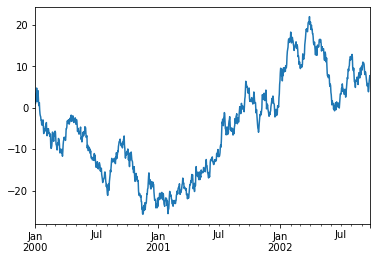

In [114]:
ts = ts.cumsum()
ts.plot()

In [115]:
plt.show()

In [116]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df

,A,B,C,D
2000-01-01,-0.964933,-0.553222,-0.395542,-1.287393
2000-01-02,1.721206,-0.389080,1.467722,0.036579
2000-01-03,0.373841,0.289541,0.694652,0.959123
2000-01-04,-1.107662,0.652615,1.349306,-0.356359
2000-01-05,-1.451527,-0.375118,-0.124743,0.139675
...,...,...,...,...
2002-09-22,-0.025488,-0.946266,-1.148484,-0.468018
2002-09-23,-0.439669,1.833137,1.480486,-0.340362
2002-09-24,1.531275,-1.690606,-0.846786,-0.353736
2002-09-25,1.911732,0.459999,0.662284,0.710359


In [117]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.964933,-0.553222,-0.395542,-1.287393
2000-01-02,0.756273,-0.942301,1.072180,-1.250814
2000-01-03,1.130114,-0.652760,1.766832,-0.291691
2000-01-04,0.022452,-0.000145,3.116137,-0.648049
2000-01-05,-1.429075,-0.375263,2.991394,-0.508375
...,...,...,...,...
2002-09-22,21.975208,2.079394,-41.086533,-4.145069
2002-09-23,21.535539,3.912531,-39.606047,-4.485431
2002-09-24,23.066814,2.221925,-40.452832,-4.839167
2002-09-25,24.978547,2.681924,-39.790548,-4.128808


<Figure size 432x288 with 0 Axes>

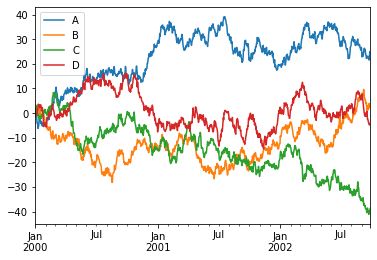

In [118]:
plt.figure()
df.plot()
plt.legend(loc="best")